# 2.0 Train model and save the results

Setup

In [1]:
import torch

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: mps


## Prepare data

Define dataset parameters and transforms

In [3]:
from torchvision import transforms

# train_mean = [0.3186241388320923, 0.2931755483150482, 0.3017965853214264]
# train_std = [0.2762017846107483, 0.2654302418231964, 0.2686000168323517]

train_mean = [0.5, 0.5, 0.5]
train_std = [0.5, 0.5, 0.5]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=train_mean, std=train_std),
])

Load the dataset

In [4]:
from torchvision.datasets import ImageFolder

train_dir = "./data/train"
train_ds = ImageFolder(train_dir, transform=transform)

num_classes = len(train_ds.classes)

print(f"Number of train images: {len(train_ds)}")
print(f"Number of train classes: {num_classes}")

Number of train images: 31367
Number of train classes: 43


Prepare data loaders

In [5]:
from torch.utils.data import DataLoader

batch_size = 256

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

## Create model

Define the latent space

In [6]:
latent_dim = 100

Define the model

In [7]:
from gnn import Generator, Discriminator

generator = Generator(num_classes, latent_dim=latent_dim).to(device)
discriminator = Discriminator(num_classes).to(device)

## Train model

Define training parameters

In [8]:
import torch.optim as optim
import torch.nn as nn

G_lr = 4e-4
D_lr = 1e-4

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=G_lr)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=D_lr)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
adv_criterion = nn.MSELoss()
cls_criterion = nn.CrossEntropyLoss()

Train the model

Epoch 0: 100%|██████████| 123/123 [00:16<00:00,  7.52it/s]


D_fake_acc=0.347, D_real_acc=0.732, acc_fake=0.859, 


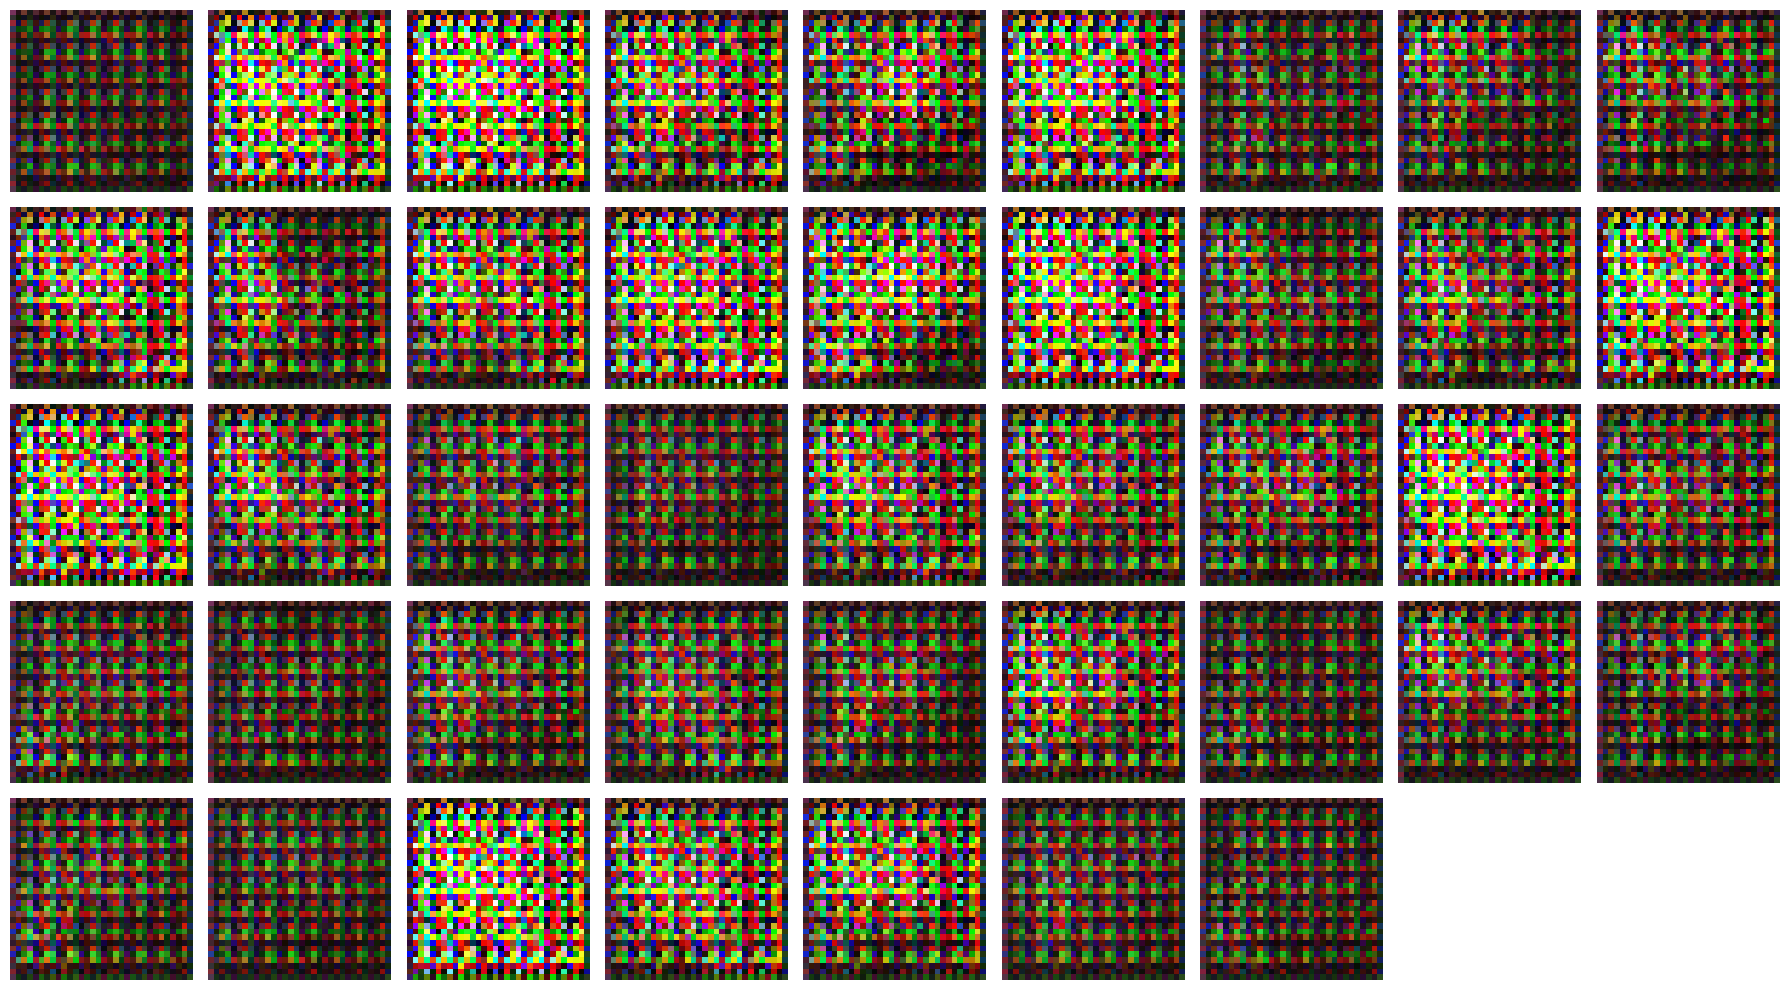

Epoch 1: 100%|██████████| 123/123 [00:11<00:00, 10.59it/s]


D_fake_acc=0.104, D_real_acc=0.878, acc_fake=0.978, 


Epoch 2: 100%|██████████| 123/123 [00:11<00:00, 10.54it/s]


D_fake_acc=0.133, D_real_acc=0.846, acc_fake=1.000, 


Epoch 3: 100%|██████████| 123/123 [00:11<00:00, 10.38it/s]


D_fake_acc=0.165, D_real_acc=0.833, acc_fake=1.000, 


Epoch 4: 100%|██████████| 123/123 [00:12<00:00, 10.14it/s]


D_fake_acc=0.186, D_real_acc=0.811, acc_fake=1.000, 


Epoch 5: 100%|██████████| 123/123 [00:11<00:00, 10.43it/s]


D_fake_acc=0.181, D_real_acc=0.811, acc_fake=1.000, 


Epoch 6: 100%|██████████| 123/123 [00:11<00:00, 10.46it/s]


D_fake_acc=0.170, D_real_acc=0.831, acc_fake=1.000, 


Epoch 7: 100%|██████████| 123/123 [00:12<00:00,  9.67it/s]


D_fake_acc=0.174, D_real_acc=0.826, acc_fake=1.000, 


Epoch 8: 100%|██████████| 123/123 [00:12<00:00,  9.75it/s]


D_fake_acc=0.184, D_real_acc=0.815, acc_fake=1.000, 


Epoch 9: 100%|██████████| 123/123 [00:12<00:00, 10.01it/s]


D_fake_acc=0.189, D_real_acc=0.811, acc_fake=1.000, 


Epoch 10: 100%|██████████| 123/123 [00:11<00:00, 10.34it/s]


D_fake_acc=0.182, D_real_acc=0.816, acc_fake=1.000, 


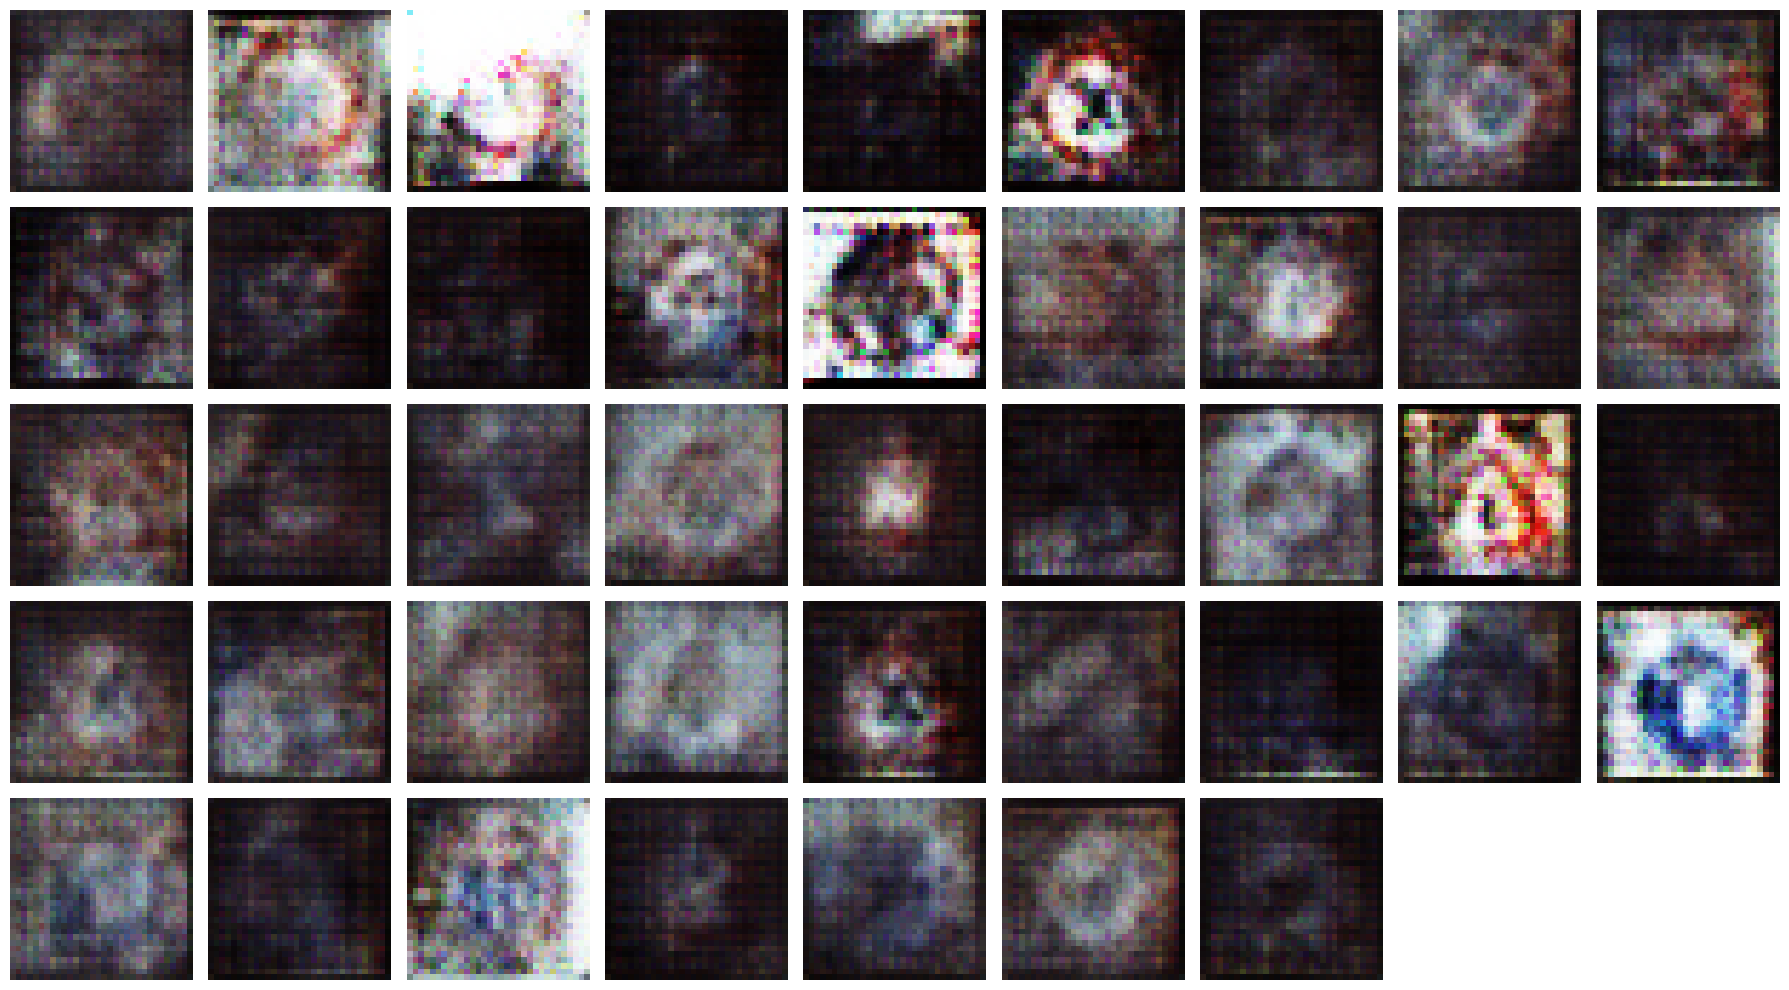

Epoch 11: 100%|██████████| 123/123 [00:12<00:00, 10.16it/s]


D_fake_acc=0.199, D_real_acc=0.800, acc_fake=1.000, 


Epoch 12: 100%|██████████| 123/123 [00:11<00:00, 10.44it/s]


D_fake_acc=0.187, D_real_acc=0.816, acc_fake=1.000, 


Epoch 13: 100%|██████████| 123/123 [00:11<00:00, 10.61it/s]


D_fake_acc=0.200, D_real_acc=0.789, acc_fake=1.000, 


Epoch 14: 100%|██████████| 123/123 [00:11<00:00, 10.36it/s]


D_fake_acc=0.209, D_real_acc=0.797, acc_fake=1.000, 


Epoch 15: 100%|██████████| 123/123 [00:11<00:00, 10.26it/s]


D_fake_acc=0.186, D_real_acc=0.813, acc_fake=1.000, 


Epoch 16: 100%|██████████| 123/123 [00:12<00:00,  9.54it/s]


D_fake_acc=0.187, D_real_acc=0.811, acc_fake=1.000, 


Epoch 17: 100%|██████████| 123/123 [00:12<00:00, 10.07it/s]


D_fake_acc=0.197, D_real_acc=0.802, acc_fake=1.000, 


Epoch 18: 100%|██████████| 123/123 [00:12<00:00, 10.04it/s]


D_fake_acc=0.189, D_real_acc=0.811, acc_fake=1.000, 


Epoch 19: 100%|██████████| 123/123 [00:16<00:00,  7.62it/s]


D_fake_acc=0.181, D_real_acc=0.814, acc_fake=1.000, 


Epoch 20: 100%|██████████| 123/123 [00:16<00:00,  7.67it/s]


D_fake_acc=0.177, D_real_acc=0.823, acc_fake=1.000, 


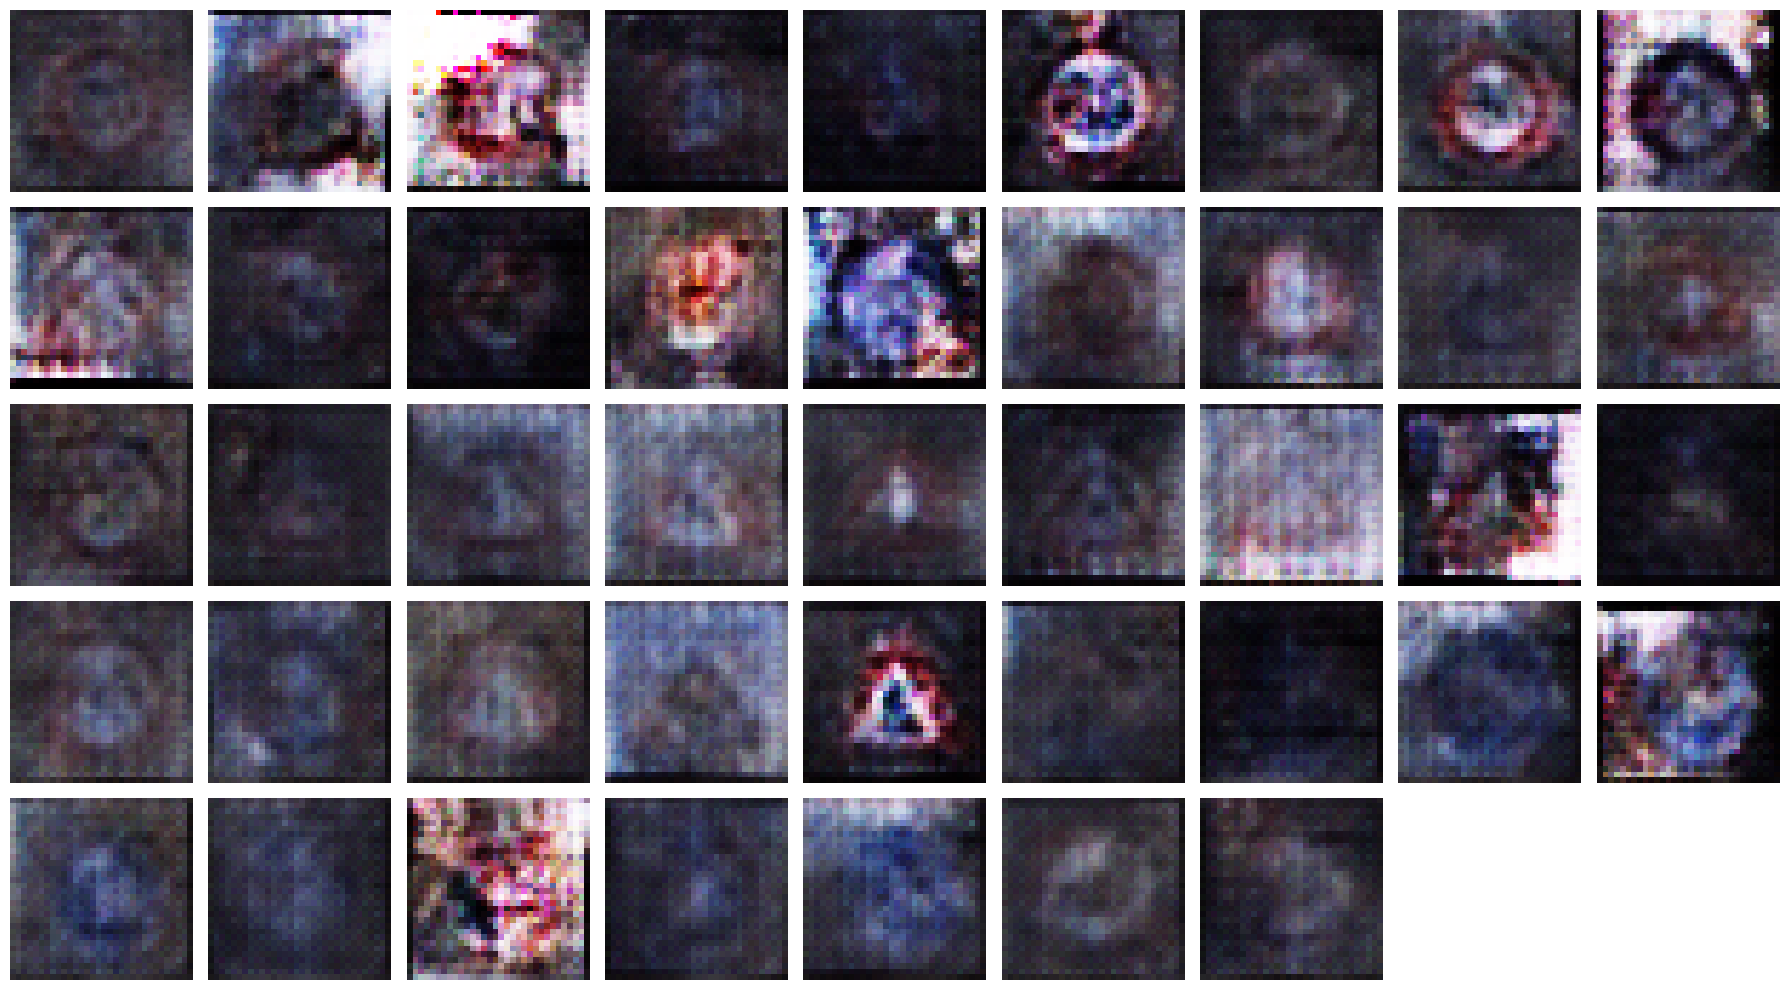

Epoch 21: 100%|██████████| 123/123 [00:11<00:00, 10.60it/s]


D_fake_acc=0.170, D_real_acc=0.831, acc_fake=1.000, 


Epoch 22: 100%|██████████| 123/123 [00:11<00:00, 10.89it/s]


D_fake_acc=0.187, D_real_acc=0.814, acc_fake=1.000, 


Epoch 23: 100%|██████████| 123/123 [00:11<00:00, 10.83it/s]


D_fake_acc=0.194, D_real_acc=0.806, acc_fake=1.000, 


Epoch 24: 100%|██████████| 123/123 [00:13<00:00,  8.83it/s]


D_fake_acc=0.193, D_real_acc=0.803, acc_fake=1.000, 


Epoch 25: 100%|██████████| 123/123 [00:12<00:00, 10.17it/s]


D_fake_acc=0.195, D_real_acc=0.808, acc_fake=1.000, 


Epoch 26: 100%|██████████| 123/123 [00:12<00:00,  9.95it/s]


D_fake_acc=0.174, D_real_acc=0.822, acc_fake=1.000, 


Epoch 27: 100%|██████████| 123/123 [00:11<00:00, 10.32it/s]


D_fake_acc=0.197, D_real_acc=0.803, acc_fake=1.000, 


Epoch 28: 100%|██████████| 123/123 [00:13<00:00,  9.36it/s]


D_fake_acc=0.204, D_real_acc=0.794, acc_fake=1.000, 


Epoch 29: 100%|██████████| 123/123 [00:12<00:00,  9.61it/s]


D_fake_acc=0.190, D_real_acc=0.808, acc_fake=1.000, 


Epoch 30: 100%|██████████| 123/123 [00:11<00:00, 10.38it/s]


D_fake_acc=0.195, D_real_acc=0.807, acc_fake=1.000, 


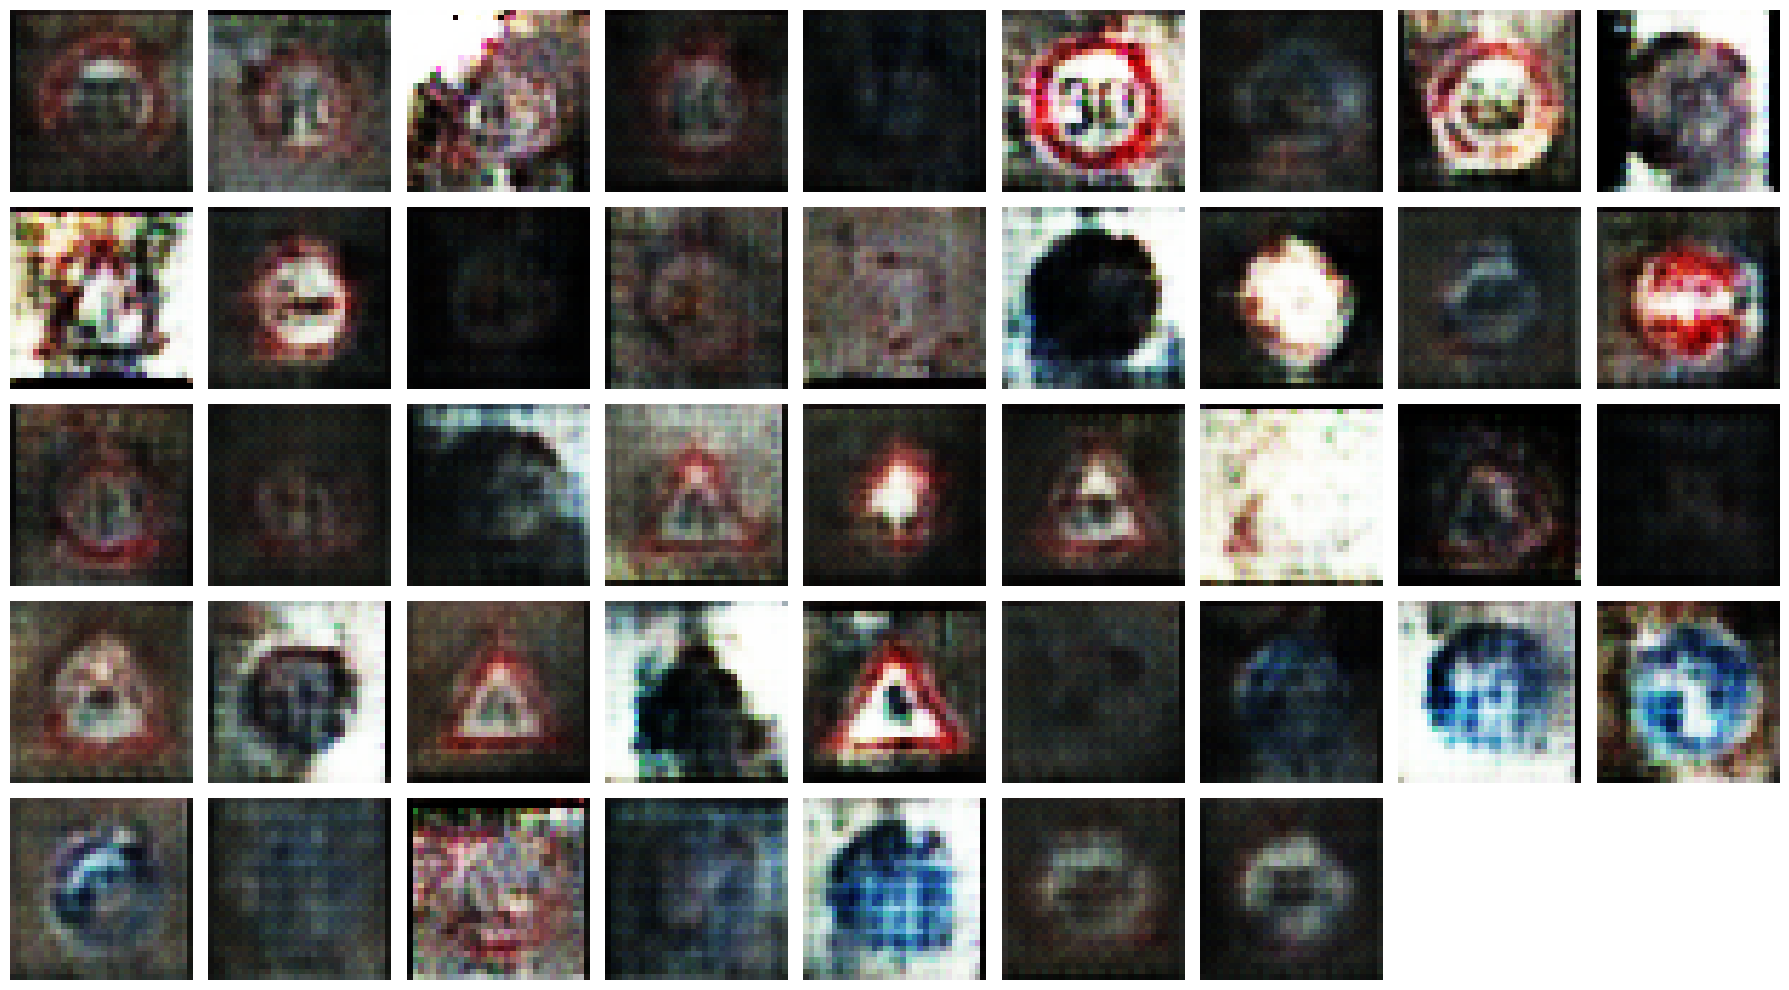

Epoch 31: 100%|██████████| 123/123 [00:12<00:00,  9.71it/s]


D_fake_acc=0.190, D_real_acc=0.809, acc_fake=1.000, 


Epoch 32: 100%|██████████| 123/123 [00:12<00:00, 10.07it/s]


D_fake_acc=0.202, D_real_acc=0.796, acc_fake=1.000, 


Epoch 33: 100%|██████████| 123/123 [00:12<00:00, 10.06it/s]


D_fake_acc=0.203, D_real_acc=0.798, acc_fake=1.000, 


Epoch 34: 100%|██████████| 123/123 [00:12<00:00,  9.92it/s]


D_fake_acc=0.187, D_real_acc=0.813, acc_fake=1.000, 


Epoch 35: 100%|██████████| 123/123 [00:12<00:00, 10.20it/s]


D_fake_acc=0.193, D_real_acc=0.807, acc_fake=1.000, 


Epoch 36: 100%|██████████| 123/123 [00:12<00:00,  9.75it/s]


D_fake_acc=0.191, D_real_acc=0.808, acc_fake=1.000, 


Epoch 37:  38%|███▊      | 47/123 [00:04<00:07,  9.82it/s]

In [ ]:
from gnn import Trainer as GNNTrainer

gnn_trainer = GNNTrainer(num_classes, adversarial_criterion=adv_criterion, classification_criterion=cls_criterion, latent_dim=latent_dim, device=device)
gnn_trainer.set_generator(generator, generator_optimizer, generator_scheduler)
gnn_trainer.set_discriminator(discriminator, discriminator_optimizer, discriminator_scheduler)

# Training
loss = gnn_trainer.fit(train_dl, num_epochs=100, mean=train_mean, std=train_std)

## Evaluation

Load test dataset

In [ ]:
test_dir = "./data/test"
test_ds = ImageFolder(test_dir, transform=transform)

Generate samples and save them to results folder

In [ ]:
import os
import time

from collections import Counter
from torchvision.utils import save_image


results_id = time.time()
results_dir = f"./results/{results_id}"

os.makedirs(results_dir, exist_ok=True)

class_counts = Counter(test_ds.targets)

mean_t = torch.tensor(train_mean).view(1, 3, 1, 1).to(device)
std_t = torch.tensor(train_std).view(1, 3, 1, 1).to(device)

generator.eval()

for cls, cnt in class_counts.items():
    for i in range(cnt):
        z = torch.randn(1, latent_dim, device=device)
        labels = torch.tensor([cls], device=device)
        with torch.no_grad():
            img = generator(z, labels)

        img = img * std_t + mean_t

        fname = os.path.join(results_dir, f"{cls}_{i}.jpg")
        save_image(img.clamp(0, 1), fname)

Calculate the FID between test set and generated images

In [ ]:
from pytorch_fid.fid_score import calculate_fid_given_paths

test_flat_dir = "./data/test_flat"
generated_dir = results_dir

fid = calculate_fid_given_paths([test_flat_dir, generated_dir], batch_size, device, dims=2048, num_workers=1)

print(f"FID: {fid}")

100%|██████████| 62/62 [00:40<00:00,  1.54it/s]


FID: 222.39008953814684
